In [1]:
%matplotlib inline
from tools import *

# Ch04 数据表示与特征工程

-   连续特征 ( Continuous Feature ) 。
-   分类特征 ( Categorical Feature ) ，也叫离散特征 ( Discrete Feature ) 。

特征工程：找到最佳的数据表示。

虽然神经网络已经可以自动完成特征的选择和变换，但是深入学习特征变换的原理，可以帮助理解神经网络对数据进行了哪种变化，从而加深对数据的理解，能够更加显式地操纵数据变换过程，提高数据变换的效率和加入更多的先验信息。

## 4.4 单变量非线性变换

基于树的模型只关注特征的顺序，但是线性模型和神经网络则依赖于每个特征的尺度和分布。

-   如果在特征和目标之间存在非线性关系，那么建模就变得困难，使用 log 或者  exp 函数就可以调节数据的相对比例，从而改进模型的学习效果，特别是对于回归问题帮助更大。
-   如果处理具有周期性模式的数据时，sin 和 cos 函数则非常有用。

大部分模型对于特征属于高斯分布时表现最好，在回归问题中还包括目标值属于高斯分布时表现最好

因为泊松分布与正态分布之间的关系因此使用正态分布建立泊松分布

详细描述：[二项分布、泊松分布与正态分布之间的关系](https://hongyitong.github.io/2016/11/13/%E4%BA%8C%E9%A1%B9%E5%88%86%E5%B8%83%E3%80%81%E6%B3%8A%E6%9D%BE%E5%88%86%E5%B8%83%E3%80%81%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83/)

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [3]:
print("每个特征出现的次数:\n{}".format(np.bincount(X[:, 0])))

每个特征出现的次数:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0
  0  0  1  3  0  1  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1]


Text(0.5, 1.0, '图4-7：X[:,0]特征取值的直方图')

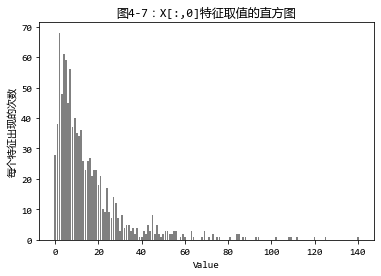

In [4]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("每个特征出现的次数")
plt.xlabel("Value")
plt.title("图4-7：X[:,0]特征取值的直方图")

In [5]:
# 使用 Ridge 对原始数据进行学习
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [6]:
# 应用对数变换有效（因为数据本身就是基于高斯分布使用指数函数生成的）
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

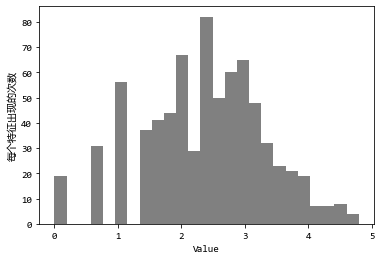

In [7]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("每个特征出现的次数")
plt.xlabel("Value")

In [8]:
# 再使用岭回归模型学习数据，拟合效果变好。（理解：将数据转换为高斯分布，因为岭回归就是基于L2正则的最小二乘法）
# 所有的线性模型对于高斯分布的数据效果都比较好
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875
